<a href="https://colab.research.google.com/github/Digvijay25/PyTorch-Deep-Learning-Bootcamp/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [7]:
torch.__version__

'2.6.0+cu124'

In [8]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [9]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [10]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  plt.legend(prop={'size': 14})

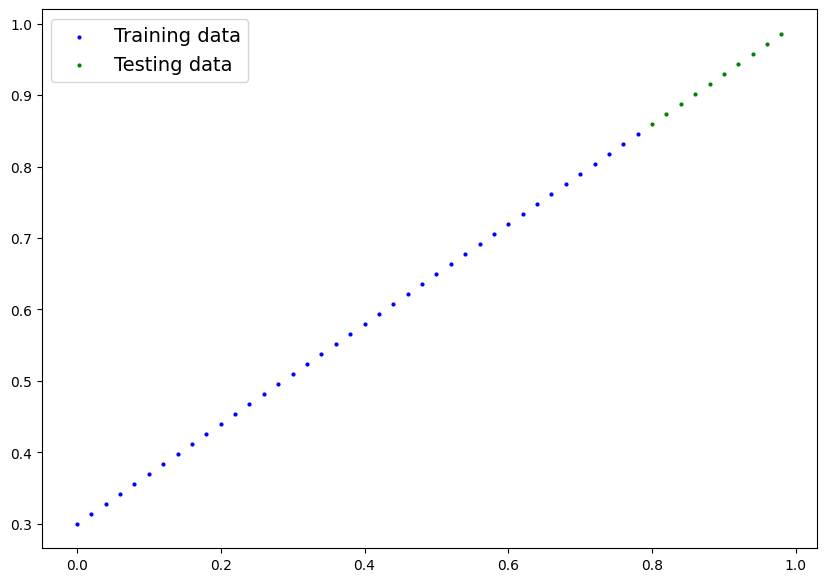

In [11]:
plot_predictions()

In [12]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype=float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [13]:
torch.manual_seed(42)

model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288]))])

In [15]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

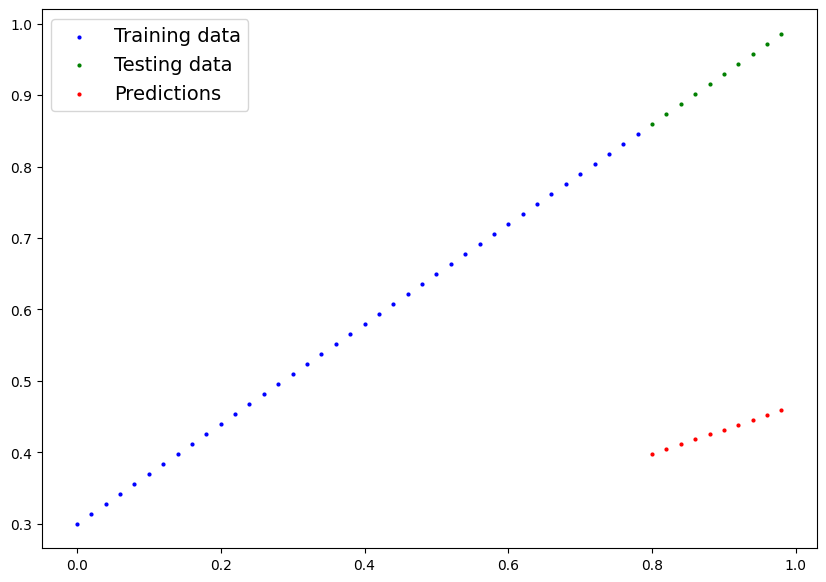

In [16]:
plot_predictions(predictions=y_preds)

In [17]:
loss_fn = torch.nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [18]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  model_0.train()
  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test.type(torch.float))

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())
      print(f'Epoch: {epoch} | MAE Train loss: {loss} | MAE Test loss: {test_loss}')



Epoch: 0 | MAE Train loss: 0.31288135462074396 | MAE Test loss: 0.48106517657284636
Epoch: 10 | MAE Train loss: 0.19767130161291763 | MAE Test loss: 0.34635512328282925
Epoch: 20 | MAE Train loss: 0.0890872000492173 | MAE Test loss: 0.21729647799466795
Epoch: 30 | MAE Train loss: 0.05314849356034055 | MAE Test loss: 0.1446400721350576
Epoch: 40 | MAE Train loss: 0.04543793101588774 | MAE Test loss: 0.11360938191817808
Epoch: 50 | MAE Train loss: 0.041678607941992046 | MAE Test loss: 0.0991993499781723
Epoch: 60 | MAE Train loss: 0.038189304210156275 | MAE Test loss: 0.08886617943332288
Epoch: 70 | MAE Train loss: 0.034760873370757894 | MAE Test loss: 0.08059368956507082
Epoch: 80 | MAE Train loss: 0.03132382100984506 | MAE Test loss: 0.07232119969681874
Epoch: 90 | MAE Train loss: 0.027887402333746047 | MAE Test loss: 0.06473560338743252


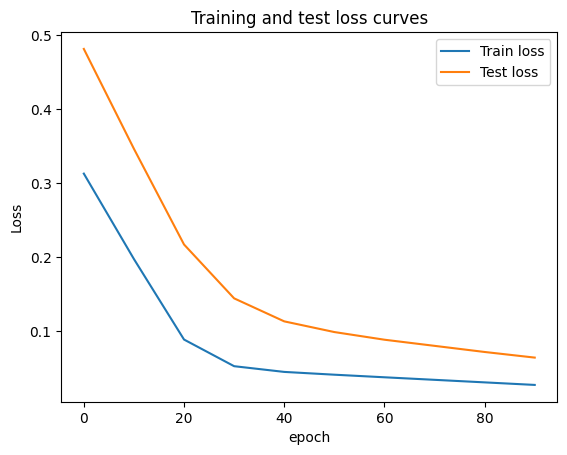

In [19]:
plt.plot(epoch_count, train_loss_values, label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784], dtype=torch.float64)),
             ('bias', tensor([0.3513]))])

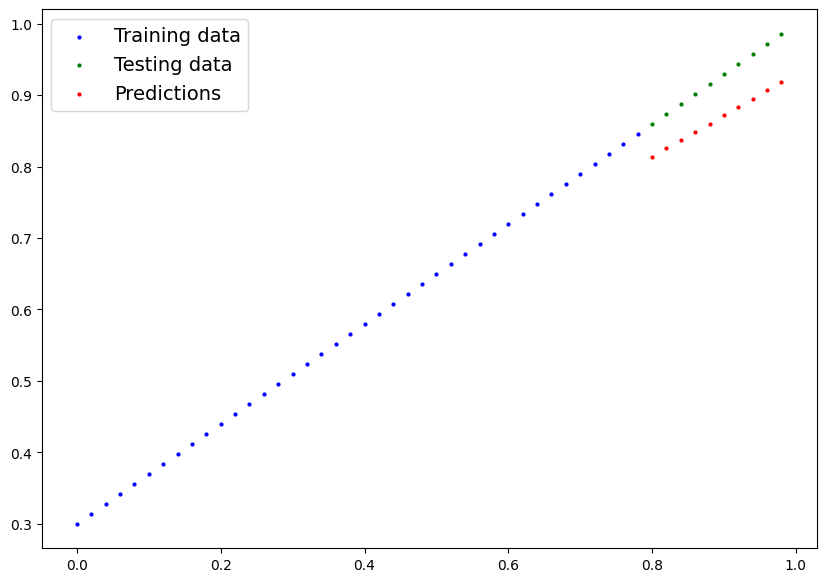

In [21]:
plot_predictions(predictions=test_pred)

In [22]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_0.pth)'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(MODEL_SAVE_PATH)
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)



models/01_pytorch_workflow_model_0.pth)


In [23]:
loaded_model_0 = LinearRegression()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [24]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [25]:
loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]], dtype=torch.float64)

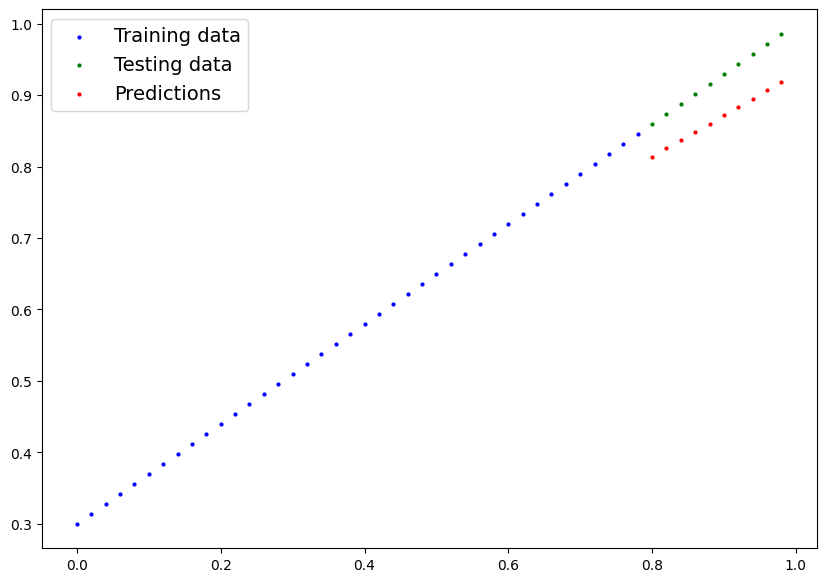

In [26]:
plot_predictions(predictions=loaded_model_preds)

In [27]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [29]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [30]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

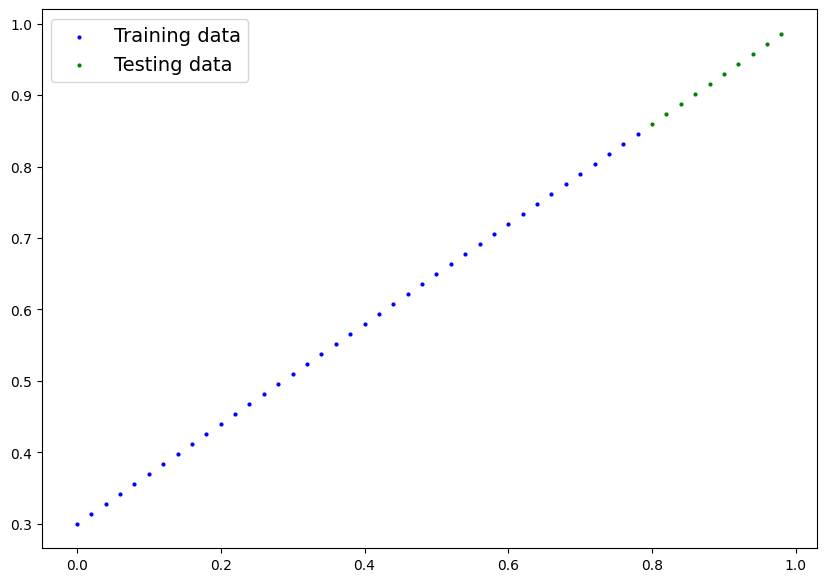

In [31]:
plot_predictions(X_train, y_train, X_test, y_test)

In [46]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModel()
model_1, model_1.state_dict()


(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [47]:
next(model_1.parameters()).device

device(type='cpu')

In [48]:
model_1.to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [49]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [50]:
torch.manual_seed(42)

epochs = 1000
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}')



Epoch: 0 | Train loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 100 | Train loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 300 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 400 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 500 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 600 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 700 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 800 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 900 | Train loss: 0.0012645035749301314 | Test loss: 0.013801801018416882


In [52]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

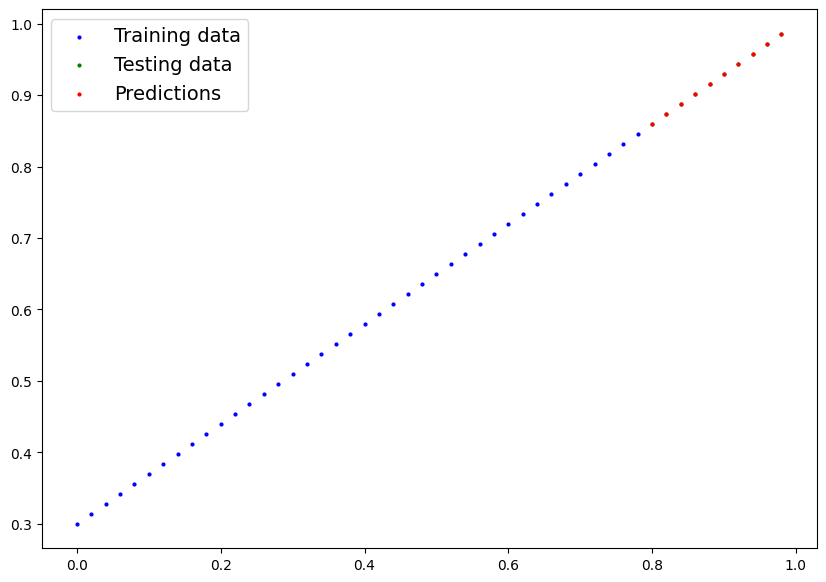

In [55]:
plot_predictions(predictions=test_pred.cpu())

In [56]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

In [57]:
load_model_1 = LinearRegressionModel()

load_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

load_model_1.to(device)

load_model_1

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [58]:
load_model_1.eval()
with torch.inference_mode():
  load_model_pred = load_model_1(X_test)

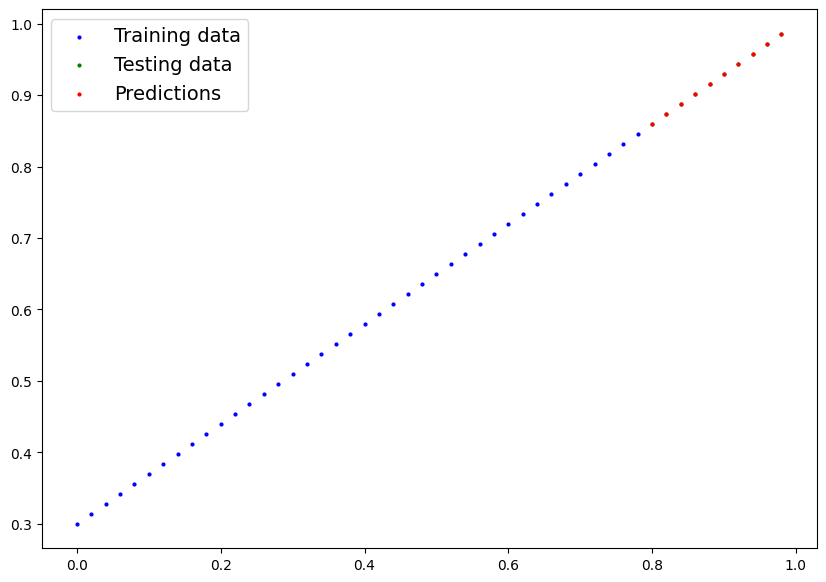

In [60]:
plot_predictions(predictions=load_model_pred.cpu())

# Exercise

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
weight = 0.3
bias = 0.9

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions = None):
  plt.figure(figsize=(10, 5))
  plt.scatter(X_train, y_train, c='b', s = 4, label = 'Training data')
  plt.scatter(X_test, y_test, c='r', s = 4, label= 'Test data')

  if predictions != None:
    plt.scatter(X_test, predictions, c = 'g', s=4, label = 'predictions')

  plt.legend(prop={'size':14})

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
X_train.shape, y_train.shape

(torch.Size([40, 1]), torch.Size([40, 1]))

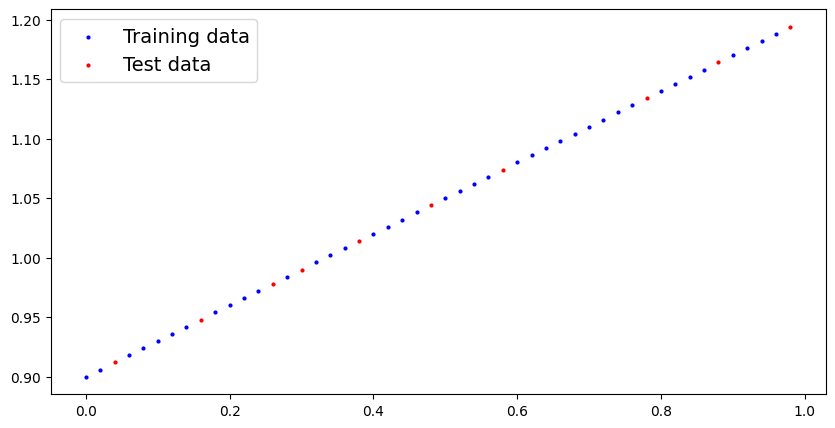

In [7]:
plot_predictions(X_train, y_train, X_test, y_test)

In [8]:
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer(x)

model_2 = LinearRegressionModel2()

print(model_2.state_dict())

OrderedDict([('layer.weight', tensor([[0.3838]])), ('layer.bias', tensor([-0.0585]))])


In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.01)

In [10]:
next(model_2.parameters()).device

device(type='cpu')

In [11]:
model_2.to(device)

LinearRegressionModel2(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [12]:
next(model_2.parameters()).device

device(type='cuda', index=0)

In [13]:
epochs = 300

X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):

  model_2.train()
  train_pred = model_2(X_train)
  loss = loss_fn(train_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Training Loss: {loss} | Test Loss: {test_loss}')


Epoch: 0 | Training Loss: 0.9173634648323059 | Test Loss: 0.9056127667427063
Epoch: 10 | Training Loss: 0.7932063341140747 | Test Loss: 0.7818242311477661
Epoch: 20 | Training Loss: 0.669049084186554 | Test Loss: 0.6580355763435364
Epoch: 30 | Training Loss: 0.5448917746543884 | Test Loss: 0.5342470407485962
Epoch: 40 | Training Loss: 0.420734703540802 | Test Loss: 0.4104584753513336
Epoch: 50 | Training Loss: 0.2965775430202484 | Test Loss: 0.2866699993610382
Epoch: 60 | Training Loss: 0.17266936600208282 | Test Loss: 0.16889357566833496
Epoch: 70 | Training Loss: 0.11866798251867294 | Test Loss: 0.1312721073627472
Epoch: 80 | Training Loss: 0.10509876161813736 | Test Loss: 0.1174679547548294
Epoch: 90 | Training Loss: 0.0987444519996643 | Test Loss: 0.10849513858556747
Epoch: 100 | Training Loss: 0.09372221678495407 | Test Loss: 0.10176251083612442
Epoch: 110 | Training Loss: 0.08869999647140503 | Test Loss: 0.09587155282497406
Epoch: 120 | Training Loss: 0.08377981185913086 | Test L

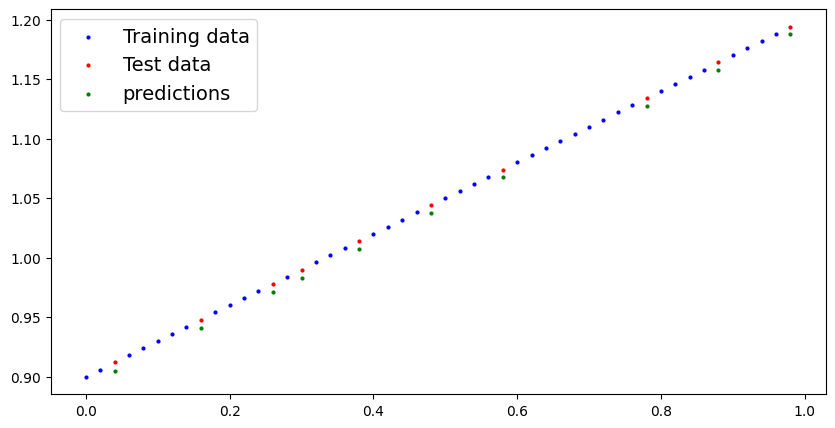

In [14]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions = test_pred.cpu())

In [21]:
model_2.state_dict()

OrderedDict([('layer.weight', tensor([[0.3046]], device='cuda:0')),
             ('layer.bias', tensor([0.8928], device='cuda:0'))])

In [17]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = 'MY_Model.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(MODEL_SAVE_PATH)
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

models/MY_Model.pth


In [18]:
loaded_model_2 = LinearRegressionModel2()

loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_2.to(device)

LinearRegressionModel2(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [19]:
loaded_model_2.state_dict()

OrderedDict([('layer.weight', tensor([[0.3009]], device='cuda:0')),
             ('layer.bias', tensor([0.8930], device='cuda:0'))])

In [20]:
loaded_model_2.eval()
with torch.inference_mode():
  y_pred = loaded_model_2(X_test)

In [21]:
y_pred

tensor([[1.0675],
        [0.9832],
        [0.9411],
        [1.0073],
        [1.1277],
        [0.9050],
        [1.1879],
        [1.0374],
        [1.1578],
        [0.9712]], device='cuda:0')

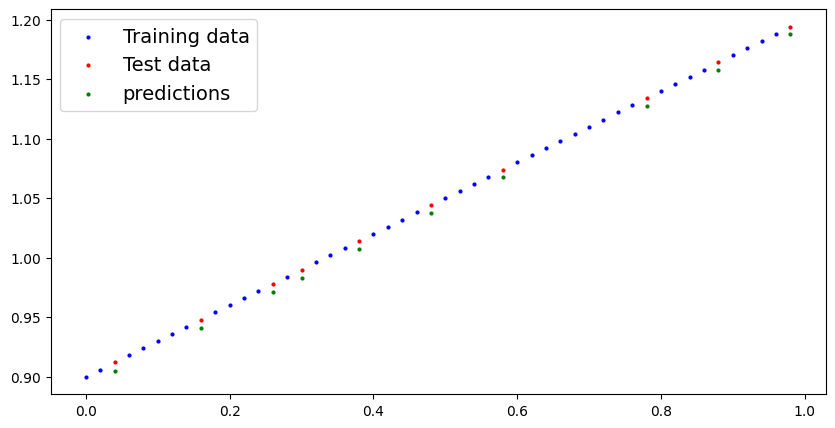

In [22]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions = y_pred.cpu())